In [4]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("msambare/fer2013")

# print("Path to dataset files:", path)

In [5]:
from pathlib import Path 

path = Path("fer2013")


In [18]:
classes_names_paths=list(path.glob('train/*'))
classes_names= [f.name for f in  classes_names_paths]

In [19]:
count_classes = len(classes_names)

In [21]:
class_disp = {}

for i in classes_names: 
   class_disp[i] = len(list(path.glob(f'*/{i}/*')))
                   
class_disp                   

{'angry': 4953,
 'disgust': 547,
 'fear': 5121,
 'happy': 8989,
 'neutral': 6198,
 'sad': 6077,
 'surprise': 4002}

In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd # Often useful for Seaborn, though not strictly necessary here
classes = list(class_disp.keys())
classes_count = list(class_disp.values())
df = pd.DataFrame({'Emotion': classes, 'Count': classes_count})

# Set a nice style for all plots
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12}) # Adjust font size globally



C:\Users\user\AppData\Local\Temp\ipykernel_17804\2440703193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotion', y='Count', data=df, palette='viridis') # Use Seaborn's barplot with a nice palette


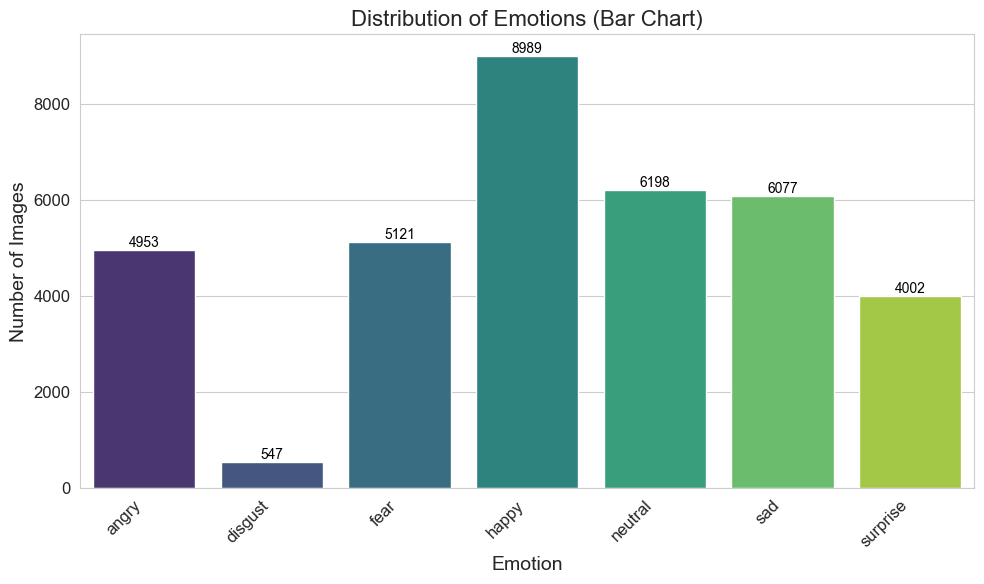

In [23]:
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
sns.barplot(x='Emotion', y='Count', data=df, palette='viridis') # Use Seaborn's barplot with a nice palette

# Add titles and labels
plt.title('Distribution of Emotions (Bar Chart)', fontsize=16)
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)

# Add value labels on top of the bars for clarity
for index, row in df.iterrows():
    plt.text(index, row['Count'], row['Count'], color='black', ha="center", va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()



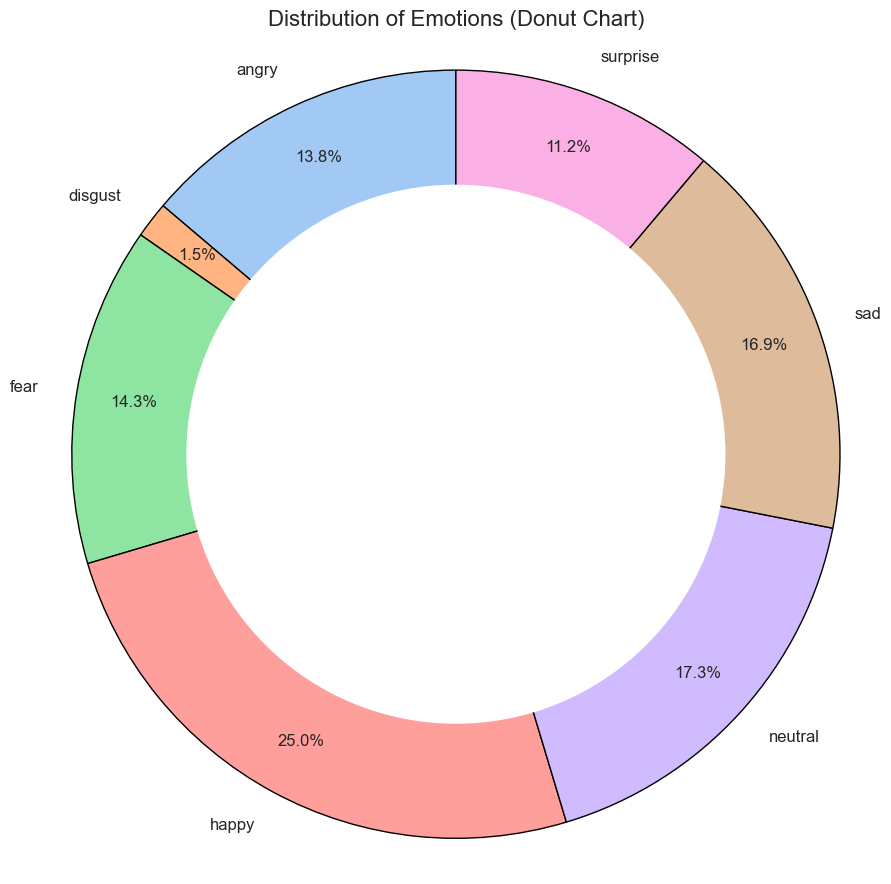

In [24]:
plt.figure(figsize=(9, 9)) # Make it square for a better circle
colors = sns.color_palette('pastel')[0:len(classes)] # Get a pastel color palette from Seaborn

# Create the pie chart
plt.pie(classes_count,
        labels=classes,
        colors=colors,
        autopct='%1.1f%%', # Format for displaying percentages
        startangle=90,     # Start the first slice at the top
        pctdistance=0.85,  # Distance of percentage labels from the center
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}) # Add borders to slices

# Draw a white circle in the center to make it a donut chart
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Emotions (Donut Chart)', fontsize=16)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

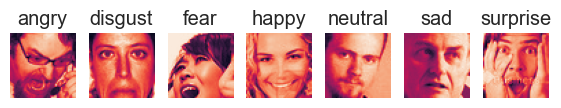

In [27]:
from PIL import Image 

plt.figure(figsize=(10,10))


for k,i in enumerate(classes_names): 
    image_path = list(path.glob(f"*/{i}/*"))[0]
    img= Image.open(image_path)
    plt.subplot(10,10,k+1)
    plt.imshow(img)
    plt.title(i)
    plt.axis(False)

In [31]:
import tensorflow as tf
data_dir = 'fer2013'

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir + '/train',
    labels='inferred',
    label_mode='categorical', # or 'int' if you want integer labels
    image_size=(48, 48),      # Example image size for FER2013
    batch_size=32,
    shuffle=True
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir + '/test',
    labels='inferred',
    label_mode='categorical',
    image_size=(48, 48),
    batch_size=32,
    shuffle=False # Typically no need to shuffle test set
)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [32]:
train_ds.class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [33]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>